# Ejercicio 1

In [2]:
import pandas as pd
import sympy as sp
import numpy as np

In [3]:
def Lx(i:int , values: list): 
    """
    Esta función calcula el coeficiente de gragange L_i(x) de forma simbólica 
    para la imterpolación de Lagrange.
    
    Parámetros:
        i = número de índice de L_i(x) po obtener
        x = lista que contiene los datos experimentales para obtener L_i(x)
    Salida:
        Regresa un polinomio de grado n-1, con n el número de datos. Este 
        polinomio será el término L_i(x) en la interpolación de Lagrange.
    """
    
    n = len(values)# Asigna el número de datos
    L, x , y = sp.symbols('L, x, y') #Creamos las variables para el cálculo simbólico
    
    #Inicializamos las variables
    y = 1
    L = 1

    #Este ciclo calcula L_i(x) haciendo los productos en la fórmula
    for j in range(n):
        if j != i-1:
            y = (x - values[j])/float((values[i-1] - values[j]))
            L *= y
    #Expandimos el resultado haciendo todos los productos
    L = sp.expand(L)
    return L

In [4]:
# Importamos los datos de un archivo txt
data = pd.read_csv(r'C:\Users\cesar.avila\Documents\IPN\Semestre 7\Física Numérica\Tareas\Tarea6\DatosLagrange.txt',
                   header=0,delim_whitespace = True)

# Recopilamos los datos de las dos columnas
E = data.iloc[:,0]
f = data.iloc[:,1]

# Transformamos los datos a dos arreglos x,y para su mejor manejo
data_x = np.float64(E)
data_y = np.float64(f)

#Número de datos
n = len(data_x)

# Definimos variables para la obtendión del polinomio y los inicializamos
g, x = sp.symbols('g, x')
g = 0.

#Calculamos el polinomio completo de Lagrange de grado n-1
for i in range(n):
    g += data_y[i]*Lx(i+1,data_x)

In [5]:
sp.pprint(g)

                        8                         7                        6  
- 1.15581968253968e-13⋅x  + 9.98107428571427e-11⋅x  - 3.54436266666667e-8⋅x  +

                      5                 4                       3             
 6.63364266666666e-6⋅x  - 0.0006944452⋅x  + 0.0395631066666667⋅x  - 1.09353836

        2                            
507937⋅x  + 11.4094238095238⋅x + 10.6


In [6]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

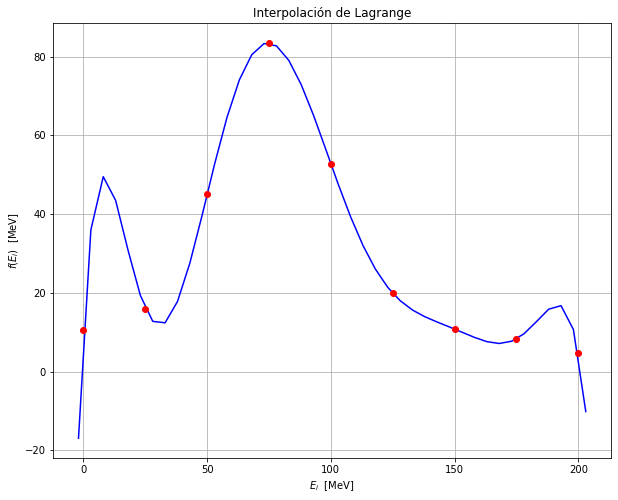

In [7]:
#Convertimos el g a un objeto tipo polinomio y guardamos sus coeficientes en una lista
p = sp.Poly(g)
coef = p.rep.rep

#Creamos el polinomio con numpy para un mejor manejo
pol = poly.Polynomial(coef[::-1])

#Creamos un arrgelo que contendrá los puntos a ser evaluados  en el eje x
valores_E = np.arange(-2.0, 205, 5) #El último parámetro contiene la longitud de los pasos

#Graficamos el polinomio y los ptos experimentales
fig = plt.figure(figsize = (10,8))
plt.plot(valores_E, pol(valores_E), 'b', data_x, data_y, 'ro')
plt.title('Interpolación de Lagrange')
plt.grid()
plt.xlabel('$E_i$  [MeV]')
plt.ylabel('$f(E_i)$  [MeV]')
plt.show()

In [8]:
#Obtengamos el máximo del polinomio de Lagrange con el criterio de la primer derivada
df = sp.diff(g,x) #1ra derivada

critic_points = list(sp.solveset(sp.Eq(df,0))) #Obtenemos las raices de la 1ra derivada

print('Las raíces de la 1ra derivada son:\n',critic_points)#Imprimimos las raíces


Las raíces de la 1ra derivada son:
 [8.29188710073911, 30.7769085373451, 74.5802207708932, 168.097363948498, 191.673104120887, 141.093133587003 - 14.6352020117278*I, 141.093133587003 + 14.6352020117278*I]


In [12]:
#obtengamos la energía de resonancia y gamma
E_r = critic_points[2]
mitad_max = sp.sympify(g).subs(x,E_r) /2. #Obtenemos el máximo por la mitad

#Raices de la ecuación g(x) = E_r
candidatos = list(sp.solveset(sp.Eq(g,mitad_max)))
print('Soluciones a la ecuación g(x) = g(E_r)/2\n',candidatos)

Soluciones a la ecuación g(x) = g(E_r)/2
 [4.15253976518238, 13.7637238439646, 48.7495359122139, 106.439115386978, 148.814112055004 - 36.4474827181311*I, 148.814112055004 + 36.4474827181311*I, 196.408145720752 - 12.0172541150965*I, 196.408145720752 + 12.0172541150965*I]


In [14]:
#Valor de Gamma
gamma = candidatos[3]- candidatos[2]

In [15]:
#Errores porcentuales
errorE_r = 100.*abs(78 - E_r)/78.
errorGamma = 100.*abs(55-gamma)/55.

print(f'Energía de resonancia: {E_r} | Con un error de: {errorE_r} %')
print(f'Gamma: {gamma} | Con un error de: {errorGamma} %')


Energía de resonancia: 74.5802207708932 | Con un error de: 4.38433234500873 %
Gamma: 57.6895794747641 | Con un error de: 4.89014449957113 %


# Ejercicio 2

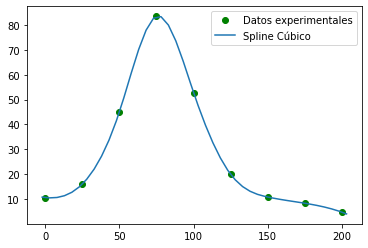

In [16]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importamos los datos de un archivo txt
data = pd.read_csv(r'C:\Users\cesar.avila\Documents\IPN\Semestre 7\Física Numérica\Tareas\Tarea6\DatosLagrange.txt'
                   ,header=0,delim_whitespace = True)

# Recopilamos los datos de las dos columnas
E = data.iloc[:,0]
f = data.iloc[:,1]

# Transformamos los datos a dos arreglos x,y para su mejor manejo
x = np.float64(E)
y = np.float64(f)

#Creamos el CubicSpline
cs = CubicSpline(x, y)

#Creamos un arrgelo que contendrá los puntos a ser evaluados  en el eje x
eje_x = np.arange(-2.0, 205, 5)
eje_y = cs(eje_x)

fig, ax = plt.subplots()
ax.plot(x,y, 'og', label = 'Datos experimentales')
ax.plot(eje_x, eje_y,  label = 'Spline Cúbico')
ax.legend(loc='upper right')
plt.show() 

In [18]:
#Esta parte evalúa de 1 en 1 nuestro ajuste para determinar el máximo y así obtener E_r
while i != 200:
    Antes = cs.__call__(i-1)
    Desp = cs.__call__(i)
    if Desp > Antes:
        E_r = i
    i += 1    

print(f'La energía de resonancia es: {E_r} MeV')

La energía de resonancia es: 76 MeV


In [20]:
from scipy.interpolate import sproot, splrep

#Maximo dividido por la mitad    
mitad_maximo = cs.__call__(E_r)/2.

#Creamos el spline recorrido como tipo splrep para poder sacar sus raices
cs_recorrido = splrep(x, y- mitad_maximo)
#sacamos las raices
r1, r2 = sproot(cs_recorrido)

#Valor de Gamma
gamma = r2 - r1
print(f'Gamma: {gamma} MeV')

Gamma: 58.41018191655321 MeV


In [21]:
#Errores porcentuales
errorE_r = 100.*abs(78 - E_r)/78.
errorGamma = 100.*abs(55-gamma)/55.

print('-'*50)
print(f'Energía de resonancia: {E_r} MeV| Con un error de: {errorE_r} %')
print(f'Gamma: {gamma} MeV| Con un error de: {errorGamma} %')

--------------------------------------------------
Energía de resonancia: 76 MeV| Con un error de: 2.5641025641025643 %
Gamma: 58.41018191655321 MeV| Con un error de: 6.200330757369479 %


# Ejercicio 3

In [14]:
import pandas as pd
import sympy as sp
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def gx(i:int , values: list): 
    """
    Esta función calcula el valor de g(x_i) usando el cálculo simbólico
    de sympy
    
    Parámetros:
        i = número de índice de x_i, i =0,1,2,...n-1 con n = no. de datos
        x = lista que contiene los datos experimentales para obtener g(x_i)
    Salida:
        Regresa la ecuación g(x_i)
    """
    
    g, a1, a2, a3 = sp.symbols('g, a1, a2, a3') #Creamos las variables para el cálculo simbólico
    
    #Inicializamos las variables
    g = 0

    #Esta parte calculo g(x_i) usando la fórmula
    
    g = a1/((values[i] - a2)**2 + a3)
    #g = sp.expand(g)
    return g

# Importamos los datos de un archivo txt
data = pd.read_csv(r'C:\Users\cesar.avila\Documents\IPN\Semestre 7\Física Numérica\Tareas\Tarea6\DatosLagrange.txt'
                   ,header=0,delim_whitespace = True)

# Recopilamos los datos de las dos columnas
E = data.iloc[:,0]
f = data.iloc[:,1]
sigma = data.iloc[:,2]

# Transformamos los datos a dos arreglos x,y para su mejor manejo
data_x = np.float64(E)
data_y = np.float64(f)
sigma_y = np.float64(sigma)

#Guardamos el número de datos 
n = len(data_x)
# Definimos variables para la obtendión g(x) y los inicializamos
g, a1, a2, a3 = sp.symbols('g, a_1, a_2, a_3')
g = 0.

# Definimos variables para la obtendión f_1, f2, f3 y los inicializamos
f1, f2, f3, aux = sp.symbols('f_1, f_2, f_3, aux')
f1 = 0.
f2 = 0.
f3 = 0.

for i in range(n):
    #Cálculo de g(x_i)
    g = gx(i,data_x)
    
    #Cálculo de  f1
    aux = (data_y[i] - g) / (((data_x[i] - a2)**2 + a3) * sigma_y[i]**2)
    #aux = sp.expand(aux)
    f1 += aux
    
    #Cálculo de  f2
    aux = (data_y[i] - g) * (data_x[i] - a2) / (((data_x[i] - a2)**2 + a3)**2 * sigma_y[i]**2)
    #aux = sp.expand(aux)
    f2 += aux
    
    #Cálculo de  f3
    aux = (data_y[i] - g) / (((data_x[i] - a2)**2 + a3)**2 * sigma_y[i]**2)
    #aux = sp.expand(aux)
    f3 += aux


In [15]:
def f_vector(f1,f2,f3, x:float, y:float, z:float):
    """Esta función calcula el f vector en la solución de Newton-Rapghson y
    evalúa a las funciones f1, f2, f3 en los puntos x,y,z. 
    Regresa una matriz."""
    
    a1, a2, a3 = sp.symbols('a1, a2, a3')

    valor1 = f1.subs([(a1,x), (a2,y), (a3,z)])
    valor2 = f2.subs([(a1,x), (a2,y), (a3,z)])
    valor3 = f3.subs([(a1,x), (a2,y), (a3,z)])
    
    return np.array([[valor1], [valor2], [valor3]])
    
def jacobiano(f1,f2,f3, x:float, y:float, z:float):
    """Esta función calcula la matriz Jacobiana en la solución de Newton-Rapghson 
    y evalúa a las derivadas parciales de f1, f2, f3 en los puntos x,y,z. 
    Regresa una matriz."""
    
    df, a1, a2, a3 = sp.symbols('df, a1, a2, a3')
    
    variables = [a1, a2, a3]
    funciones = [f1, f2, f3]
    
    #Saca la derivada y evalua los valores de a1,a2,a3=x,y,z
    J =np.array([[np.float64(sp.diff(funciones[i], variables[j]).subs([(a1,x), (a2,y), (a3,z)])) 
                 for j in range(len(variables))] for i in range(len(variables))])
    
    return J

In [17]:
#Semillas de a1,a2,a3    
x = 1.
y = 85.
z = 756.25

# Longitud a1+Delta_a1,a2+Delta_a2, a3+Delta_a3

a = [0., 0., 0.]
a_new = [x, y, z]

# Definimos el error para detener la iteración de Newton-Raphson
error = 10**(-5)
i=1

condicion = abs(a_new[0] - a[0])

#Iteraciones Newton-Raphson:
while  condicion > error:
    print(f'No. iteración: {i}')
    print(f'Condición: {condicion}')
    A = f_vector(f1, f2, f3, a_new[0], a_new[1], a_new[2]) 
    B = jacobiano(f1, f2, f3, a_new[0], a_new[1], a_new[2])
    inv_B = np.linalg.inv(B)
      
    Delta_a = -inv_B.dot(A)
    
    #Guardamos los viejos valores
    a[0] = a_new[0]
    a[1] = a_new[1]
    a[2] = a_new[2]
    
    #Asignamos los nuevos valores
    a_new[0] += Delta_a[0][0] 
    a_new[1] += Delta_a[1][0]
    a_new[2] += Delta_a[2][0]
    condicion = abs(a_new[0] - a[0])
    i+=1

print('-'*50)    
print(f'Valores:\na_1 = {a_new[0]}\na_2 = {a_new[1]} \na_3 = {a_new[2]}')

No. iteración: 1
Condición: 1.0


TypeError: can't convert expression to float

In [18]:
# -*- coding: utf-8 -*-
"""
Resonancia de Breit-Wigner
"""

import pandas as pd
import sympy as sp
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def gx(i:int , values: list): 
    """
    Esta función calcula el valor de g(x_i) usando el cálculo simbólico
    de sumpy
    
    Parámetros:
        i = número de índice de x_i, i =0,1,2,...n-1 con n = no. de datos
        x = lista que contiene los datos experimentales para obtener g(x_i)
    Salida:
        Regresa la ecuación g(x_i)
    """
    
    g, a1, a2, a3 = sp.symbols('g, a1, a2, a3') #Creamos las variables para el cálculo simbólico
    
    #Inicializamos las variables
    g = 0

    #Esta parte calculo g(x_i) usando la fórmula
    
    g = a1/((values[i] - a2)**2 + a3)
    g = sp.expand(g)
    return g

def f_vector(f1,f2,f3, x:float, y:float, z:float):
    """Esta función calcula el f vector en la solución de Newton-Rapghson y
    evalúa a las funciones f1, f2, f3 en los puntos x,y,z. 
    Regresa una matriz."""
    
    a1, a2, a3 = sp.symbols('a1, a2, a3')

    valor1 = f1.subs([(a1,x), (a2,y), (a3,z)])
    valor2 = f2.subs([(a1,x), (a2,y), (a3,z)])
    valor3 = f3.subs([(a1,x), (a2,y), (a3,z)])
    
    return np.array([[valor1], [valor2], [valor3]])
    
def jacobiano(f1,f2,f3, x:float, y:float, z:float):
    """Esta función calcula la matriz Jacobiana en la solución de Newton-Rapghson 
    y evalúa a las derivadas parciales de f1, f2, f3 en los puntos x,y,z. 
    Regresa una matriz."""
    
    df, a1, a2, a3 = sp.symbols('df, a1, a2, a3')
    
    variables = [a1, a2, a3]
    funciones = [f1, f2, f3]
    
    #Saca la derivada y evalua los valores de a1,a2,a3=x,y,z
    J =np.array([[np.float64(sp.diff(funciones[i], variables[j]).subs([(a1,x), (a2,y), (a3,z)])) 
                 for j in range(len(variables))] for i in range(len(variables))])
    
    return J
    

# Importamos los datos de un archivo txt
data = pd.read_csv(r'C:\Users\cesar.avila\Documents\IPN\Semestre 7\Física Numérica\Tareas\Tarea6\DatosLagrange.txt'
                   ,header=0,delim_whitespace = True)

# Recopilamos los datos de las dos columnas
E = data.iloc[:,0]
f = data.iloc[:,1]
sigma = data.iloc[:,2]

# Transformamos los datos a dos arreglos x,y para su mejor manejo
data_x = np.float64(E)
data_y = np.float64(f)
sigma_y = np.float64(sigma)

#Guardamos el número de datos 
n = len(data_x)

# Definimos variables para la obtendión g(x) y los inicializamos
g, a1, a2, a3 = sp.symbols('g, a1, a2, a3')
g = 0.

# Definimos variables para la obtendión f_1, f2, f3 y los inicializamos
f1, f2, f3, aux = sp.symbols('f1, f2, f3, aux')
f1 = 0.
f2 = 0.
f3 = 0.



for i in range(n):
    #Cálculo de g(x_i)
    g = gx(i,data_x)
    #Cálculo de  f1
    aux = (data_y[i] - g) / (((data_x[i] - a2)**2 + a3) * sigma_y[i]**2)
    aux = sp.expand(aux)
    f1 += aux
    
    #Cálculo de  f2
    aux = (data_y[i] - g) * (data_x[i] - a2) / (((data_x[i] - a2)**2 + a3)**2 * sigma_y[i]**2)
    aux = sp.expand(aux)
    f2 += aux
    
    #Cálculo de  f3
    aux = (data_y[i] - g) / (((data_x[i] - a2)**2 + a3)**2 * sigma_y[i]**2)
    aux = sp.expand(aux)
    f3 += aux

#Semillas de a1,a2,a3    
x = 1.
y = 85.
z = 756.25

# Longitud a1+Delta_a1,a2+Delta_a2, a3+Delta_a3

a = [0., 0., 0.]
a_new = [x, y, z]

# Definimos el error para detener la iteración de Newton-Raphson
error = 10**(-5)
i=1

condicion = abs(a_new[0] - a[0])

#Iteraciones Newton-Raphson:
while  condicion > error:
    print(f'No. iteración: {i}')
    print(f'Condición: {condicion}')
    A = f_vector(f1, f2, f3, a_new[0], a_new[1], a_new[2]) 
    B = jacobiano(f1, f2, f3, a_new[0], a_new[1], a_new[2])
    inv_B = np.linalg.inv(B)
      
    Delta_a = -inv_B.dot(A)
    
    #Guardamos los viejos valores
    a[0] = a_new[0]
    a[1] = a_new[1]
    a[2] = a_new[2]
    
    #Asignamos los nuevos valores
    a_new[0] += Delta_a[0][0] 
    a_new[1] += Delta_a[1][0]
    a_new[2] += Delta_a[2][0]
    condicion = abs(a_new[0] - a[0])
    i+=1

print('-'*50)    
print(f'Valores:\na_1 = {a_new[0]}\na_2 = {a_new[1]} \na_3 = {a_new[2]}')

No. iteración: 1
Condición: 1.0
No. iteración: 2
Condición: 67655.4330261934
No. iteración: 3
Condición: 24614.9900253153
No. iteración: 4
Condición: 28442.6096127858
No. iteración: 5
Condición: 3793.96340011013
No. iteración: 6
Condición: 434.129151612229
No. iteración: 7
Condición: 1788.56911727491
No. iteración: 8
Condición: 982.129104051593
No. iteración: 9
Condición: 163.747680600121
No. iteración: 10
Condición: 4.04242087905004
No. iteración: 11
Condición: 0.00249124612309970
--------------------------------------------------
Valores:
a_1 = 70995.3968045506
a_2 = 78.2055214202417 
a_3 = 877.575841650900


# Ejercicio 4

In [1]:
import pandas as pd
import sympy as sp
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def gx(i:int , values: list): 
    """
    Esta función calcula el valor de g(x_i) usando el cálculo simbólico
    de sumpy
    
    Parámetros:
        i = número de índice de x_i, i =0,1,2,...n-1 con n = no. de datos
        x = lista que contiene los datos experimentales para obtener g(x_i)
    Salida:
        Regresa la ecuación g(x_i)
    """
    
    g, a1, a2 = sp.symbols('g, a1, a2') #Creamos las variables para el cálculo simbólico
    
    #Inicializamos las variables
    g = 0.

    #Esta parte calculo g(x_i) usando la fórmula
    
    g = a1*sp.exp(-a2*values[i])
    g = sp.expand(g)
    return g

def f_vector(f1,f2, x:float, y:float):
    """Esta función calcula el f vector en la solución de Newton-Rapghson y
    evalúa a las funciones f1, f2 en los puntos x,y. 
    Regresa una matriz."""
    
    a1, a2 = sp.symbols('a1, a2')

    valor1 = f1.subs([(a1,x), (a2,y)])
    valor2 = f2.subs([(a1,x), (a2,y)])

    
    return np.array([[valor1], [valor2]])
    
def jacobiano(f1,f2, x:float, y:float):
    """Esta función calcula la matriz Jacobiana en la solución de Newton-Rapghson 
    y evalúa a las derivadas parciales de f1, f2, f3 en los puntos x,y,z. 
    Regresa una matriz."""
    
    df, a1, a2 = sp.symbols('df, a1, a2')
    
    variables = [a1, a2]
    funciones = [f1, f2]
    
    #Saca la derivada y evalua los valores de a1,a2 = x,y
    J = np.array([[np.float64(sp.diff(funciones[i], variables[j]).subs([(a1,x), (a2,y)])) 
                 for j in range(len(variables))] for i in range(len(variables))])
    
    return J
    
# Importamos los datos de un archivo txt
data = pd.read_csv(r'C:\Users\cesar.avila\Documents\IPN\Semestre 7\Física Numérica\Tareas\Tarea6\DatoVoltage.txt'
                   ,header=0,delim_whitespace = True)

# Recopilamos los datos de las dos columnas
t = data.iloc[:,0]
V = data.iloc[:,1]
sigma = data.iloc[:,2]

# Transformamos los datos a dos arreglos x,y para su mejor manejo
data_x = np.float64(t)
data_y = np.float64(V)
sigma_y = np.float64(sigma)


#Guardamos el número de datos 
n = len(data_x)

# Definimos variables para la obtendión g(x) y los inicializamos
g, a1, a2 = sp.symbols('g, a1, a2')
g = 0.

# Definimos variables para la obtendión f_1, f2, f3 y los inicializamos
f1, f2, aux = sp.symbols('f1, f2, aux')
f1 = 0.
f2 = 0.

for i in range(n):
    #Cálculo de g(x_i)
    g = gx(i,data_x)
    #Cálculo de  f1
    aux = (data_y[i] - g) * sp.exp(-a2*data_x[i]) / sigma_y[i]**2
    aux = sp.expand(aux)
    f1 += aux
    
    #Cálculo de  f2
    aux = (data_y[i] - g) * data_x[i] * sp.exp(-a2*data_x[i]) / sigma_y[i]**2
    aux = sp.expand(aux)
    f2 += aux
 
#Semillas de a1,a2,  
x = 1.
y = 0.00001

# Longitud a1+Delta_a1,a2+Delta_a2, a3+Delta_a3

a = [0., 0.]
a_new = [x, y]

# Definimos el error para detener la iteración de Newton-Raphson
error = 10**(-20)
i=1

condicion1 = abs(a_new[0] - a[0])

#Iteraciones Newton-Raphson:
while  (condicion1 > error):
    A = f_vector(f1, f2, a_new[0], a_new[1]) 
    B = jacobiano(f1, f2, a_new[0], a_new[1])
    inv_B = np.linalg.inv(B)
      
    Delta_a = -inv_B.dot(A)
    
    #Guardamos los viejos valores
    a[0] = a_new[0]
    a[1] = a_new[1]
    
    #Asignamos los nuevos valores
    a_new[0] += np.float64(Delta_a[0][0])
    a_new[1] += np.float64(Delta_a[1][0])
    
    condicion1 = abs(a_new[0] - a[0])
    print(f'No. iteración: {i}')
    print(f'Condición: {condicion1}')
    i+=1

print('-'*50)    
print(f'Valores:\na_1 = {a_new[0]}\na_2 = {a_new[1]}')


No. iteración: 1
Condición: 0.18833957009718816
No. iteración: 2
Condición: 0.23662530371362678
No. iteración: 3
Condición: 0.5614541732550196
No. iteración: 4
Condición: 0.8751231332017051
No. iteración: 5
Condición: 0.9606525935785575
No. iteración: 6
Condición: 0.757634102786926
No. iteración: 7
Condición: 0.4757632327253978
No. iteración: 8
Condición: 0.24266713986132515
No. iteración: 9
Condición: 0.0813043061961558
No. iteración: 10
Condición: 0.010600811190355941
No. iteración: 11
Condición: 0.00020256647960081864
No. iteración: 12
Condición: 8.230561210353926e-08
No. iteración: 13
Condición: 1.4210854715202004e-14
No. iteración: 14
Condición: 0.0
--------------------------------------------------
Valores:
a_1 = 5.013687875197109
a_2 = 0.01221930618762891


In [2]:
# Cálculo de chi^2 con los valores de a_1 = a_new[0] y a_2 = a_new[1]

chi = sp.symbols('chi') # Creamos las variables para el cálculo simbólico
    
#Inicializamos las variables
chi = 0.

for i in range(len(data_x)):
    aux = ((data_y[i] - a_new[0]*np.exp(- a_new[1] *data_x[i])) / sigma_y[i])**2 
    chi += aux
    
print('-'*50)
print(f'Valor de chi^2: {chi}')


--------------------------------------------------
Valor de chi^2: 11.653063986177251


In [3]:
# Hagamos una gráfica semilog para obtener ajuste por mínimos cuadrados a una recta

logaritmos = np.log(data_y)
incertidumbre_ln = sigma_y/data_y


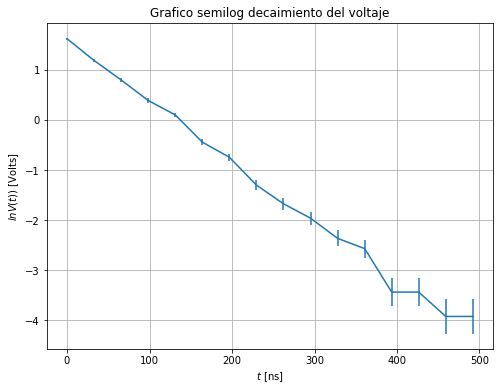

In [4]:
# Graficquemos y obtengamos el ajuste 
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(data_x, logaritmos, yerr=incertidumbre_ln) # Grafica la incertidumbre en cada punto
ax.set_ylabel('$ln V(t))$ [Volts]')
ax.set_xlabel('$t$ [ns]')
ax.set_title('Grafico semilog decaimiento del voltaje')
ax.grid()
plt.show()


In [5]:
# Obtengamos el ajuste de recta por mínimos cuadrados
S = 0.
Sx = 0.
Sy = 0.
Sxx = 0.
Sxy = 0.

for i in range(len(logaritmos)):
    S += 1/incertidumbre_ln[i]**2
    Sx += data_x[i]/incertidumbre_ln[i]**2
    Sy += logaritmos[i]/incertidumbre_ln[i]**2
    Sxx += data_x[i]**2 / incertidumbre_ln[i]**2
    Sxy += data_x[i]*logaritmos[i] / incertidumbre_ln[i]**2

# Solución al sistema de ecuaciones  
matriz1 = np.array([[S, Sx],[Sx, Sxx]])
matriz2 = np.array([[Sy], [Sxy]])

inversa = np.linalg.inv(matriz1)
resultado = inversa.dot(matriz2)
# b = ordenada al origen y m = pendiente
b, m = float(resultado[0]), float(resultado[1])

print('-'*50)
print(f'Los valores de Gamma y V_0 por este ajuste son:')
print(f'Gamma: {-m}')
print(f'V_0: {np.exp(b)}')

--------------------------------------------------
Los valores de Gamma y V_0 por este ajuste son:
Gamma: 0.012139925808506362
V_0: 5.002014936967898


# Ejercicio 5

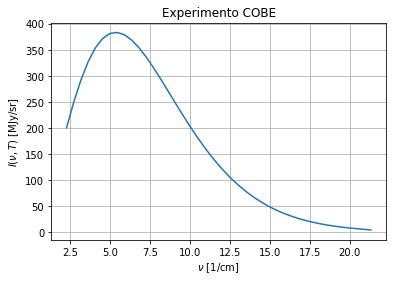

In [25]:
import pandas as pd
import numpy as np

#Leemos el archivo
data = pd.read_csv(r'C:\Users\cesar.avila\Documents\IPN\Semestre 7\Física Numérica\Tareas\Tarea6\COBE.txt'
                   ,header=0,delim_whitespace = True)

# Extraccion de datos 
Nu = data.iloc[:,0]
I = data.iloc[:,1]
Error = data.iloc[:,2]

# Manejo de los datos a flotantes
nu_float = np.float64(Nu)
I_float = np.float64(I)
Error_float = np.float64(Error)/1000

fig, ax = plt.subplots()
ax.errorbar(nu_float, I_float, yerr=Error_float)
ax.set_xlabel('$\\nu$ [1/cm]')
ax.set_ylabel('$I(\\nu, T)$ [MJy/sr]')
ax.set_title('Experimento COBE')
ax.grid()
plt.show()

In [26]:
# Valores de las contantes (Usaremos unidades del SI)
h = 6.6261E-34 # Cte de Planck en J*s 
c = 2.9979E8 # Vel. luz en m/s
k =1.3806E-23 # Cte de Boltzmann en J/Kelvin

#Transformamos los valores de la irradiancia y la frecuencia a unidades SI
nu_SI = nu_float*2.9979E10
I_SI = I_float*1E-20
SigmaI_SI = Error_float*1E-20

In [27]:
#Guadamos los valores para el ajuste de recta en tres listas distintas
logaritmos = []
incertidumbre_ln = []
eje_x = np.float64(h*nu_SI/k)

for i in range(len(nu_SI)):
    valor1 = np.log((2*h*nu_SI[i]**3)/(c**2 * I_SI[i]) +1 )
    valor2 = (2*h*nu_SI[i]**3 / c**2 * I_SI[i]**2) *SigmaI_SI[i] / ((2*h*nu_SI[i]**3)/(c**2 * I_SI[i]) +1)
    logaritmos.append(np.float64(valor1))
    incertidumbre_ln.append(np.float64(valor2))

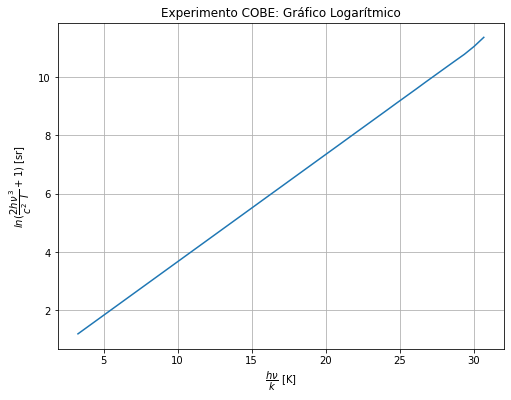

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(eje_x, logaritmos, yerr=incertidumbre_ln) # Grafica la incertidumbre en cada punto
ax.set_xlabel('$\dfrac{h \\nu}{k}$ [K]')
ax.set_ylabel('$ln (\dfrac{2 h}{c^2} \dfrac{\\nu^3}{I} + 1)$ [sr]')
ax.set_title('Experimento COBE: Gráfico Logarítmico')
ax.grid()
plt.show()

In [30]:
# Obtengamos el ajuste por mínimos cuadrados
S = 0.
Sx = 0.
Sy = 0.
Sxx = 0.
Sxy = 0.

for i in range(len(logaritmos)):
    S += 1/incertidumbre_ln[i]**2
    Sx += eje_x[i]/incertidumbre_ln[i]**2
    Sy += logaritmos[i]/incertidumbre_ln[i]**2
    Sxx += eje_x[i]**2 / incertidumbre_ln[i]**2
    Sxy += eje_x[i]*logaritmos[i] / incertidumbre_ln[i]**2

In [31]:
# Solución al sistema de ecuaciones  
matriz1 = np.array([[S, Sx],[Sx, Sxx]])
matriz2 = np.array([[Sy], [Sxy]])

inversa = np.linalg.inv(matriz1)
resultado = inversa.dot(matriz2)

a1, a2 = float(resultado[0]), float(resultado[1])
print(a1, a2)

-0.6969042846340017 0.3915557263619007


In [32]:
print(f'La temperatura es: {1/a2} K')

La temperatura es: 2.553914890458622 K
